In [ ]:
# import libraries

import nltk
from nltk.corpus import reuters, gutenberg, stopwords, udhr
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, ngrams
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# task 1

nltk.download('reuters')
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('udhr')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Unzipping corpora/udhr.zip.


True

In [ ]:
print("Reuters Corpus File IDs:")
print(reuters.fileids())

Reuters Corpus File IDs:
['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843', 'test/14844', 'test/14849', 'test/14852', 'test/14854', 'test/14858', 'test/14859', 'test/14860', 'test/14861', 'test/14862', 'test/14863', 'test/14865', 'test/14867', 'test/14872', 'test/14873', 'test/14875', 'test/14876', 'test/14877', 'test/14881', 'test/14882', 'test/14885', 'test/14886', 'test/14888', 'test/14890', 'test/14891', 'test/14892', 'test/14899', 'test/14900', 'test/14903', 'test/14904', 'test/14907', 'test/14909', 'test/14911', 'test/14912', 'test/14913', 'test/14918', 'test/14919', 'test/14921', 'test/14922', 'test/14923', 'test/14926', 'test/14928', 'test/14930', 'test/14931', 'test/14932', 'test/14933', 'test/14934', 'test/14941', 'test/14943', 'test/14949', 'test/14951', 'test/14954', 'test/14957', 'test/14958', 'test/14959', 'test/14960', 'test/14962', 'test/14963', 'test/14964', 'test/14965', 'test/14

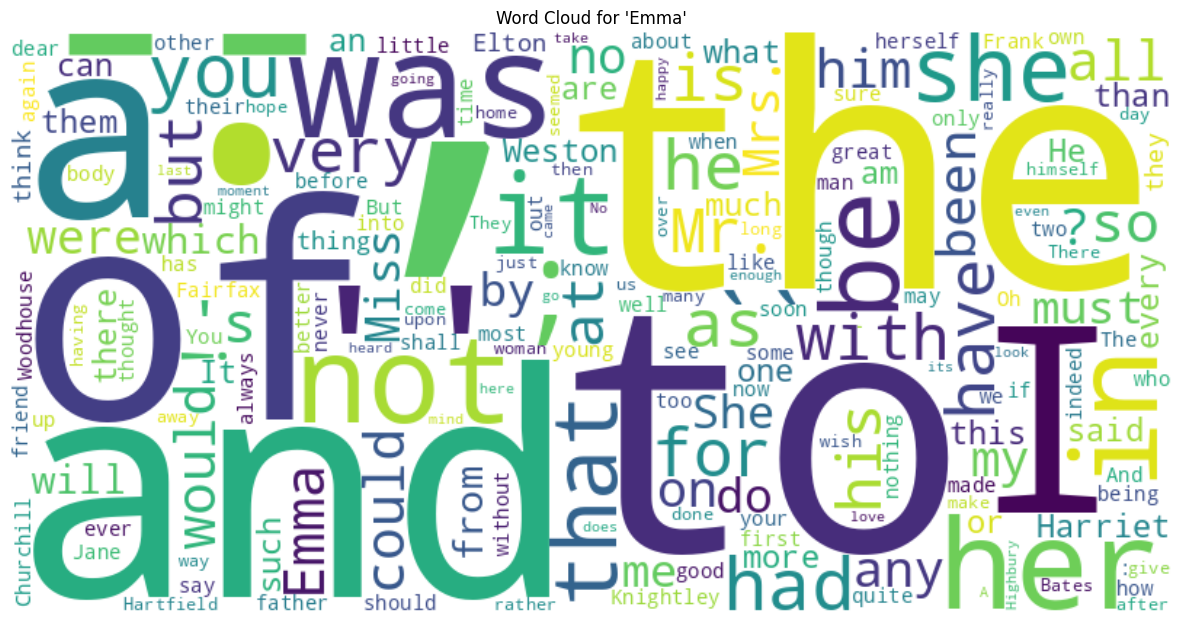

In [ ]:
# task 2

text = gutenberg.raw('austen-emma.txt')
words = word_tokenize(text)

freq_dist = Counter(words)
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for 'Emma'")
plt.show()

In [ ]:
# task 3

doc_id = reuters.fileids()[0]
raw_text = reuters.raw(doc_id)
tokens = word_tokenize(raw_text)
freq_before = Counter(tokens)
print("Top 17 words before preprocessing:")
for word, count in freq_before.most_common(17):
  print(f"{word}: {count}")

Top 17 words before preprocessing:
the: 32
.: 31
of: 30
,: 29
to: 26
said: 16
a: 14
trade: 13
U.S.: 13
in: 13
Japan: 12
's: 12
and: 12
for: 7
``: 7
'': 7
on: 6


In [ ]:
stop_words = set(stopwords.words('english'))
tokens_filtered = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]
ps = PorterStemmer()
tokens_stemmed = [ps.stem(word) for word in tokens_filtered]
freq_after = Counter(tokens_stemmed)
print("\nTop 17 words after preprocessing:")
for word, count in freq_after.most_common(17):
  print(f"{word}: {count}")


Top 17 words after preprocessing:
trade: 16
said: 16
japan: 12
export: 11
import: 6
dlr: 6
tariff: 5
billion: 5
businessmen: 4
offici: 4
might: 4
would: 4
japanes: 4
electron: 4
industri: 4
taiwan: 4
also: 4


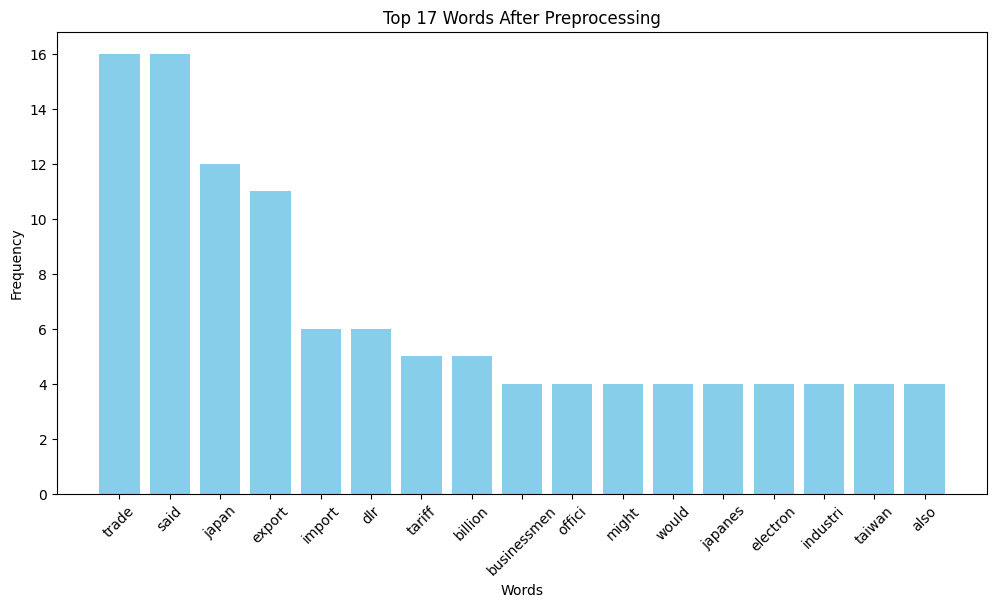

In [ ]:
top17 = freq_after.most_common(17)
plt.figure(figsize=(12, 6))
plt.bar([item[0] for item in top17], [item[1] for item in top17], color='skyblue')
plt.title("Top 17 Words After Preprocessing")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# task 4

tokens = word_tokenize(raw_text)
bigrams_list = list(bigrams(tokens))
bigram_freq = Counter(bigrams_list)
print("Top 70 most common bigrams:")
for bigram, count in bigram_freq.most_common(70):
  print(f"{bigram}: {count}")

Top 70 most common bigrams:
('.', '``'): 7
(',', "''"): 7
('the', 'U.S.'): 6
('.', 'The'): 5
('of', 'the'): 5
('billion', 'dlrs'): 5
("''", 'said'): 5
('U.S.', 'And'): 4
('in', 'the'): 4
('U.S', '.'): 4
('Hong', 'Kong'): 4
('between', 'the'): 3
('And', 'Japan'): 3
('said', '.'): 3
('against', 'Japan'): 3
('Japan', 'might'): 3
('imports', 'of'): 3
('it', 'will'): 3
('Japan', "'s"): 3
('``', 'We'): 3
('&', 'lt'): 3
('lt', ';'): 3
('>', '.'): 3
('.', 'In'): 3
('the', 'U.S'): 3
('South', 'Korea'): 3
('Japan', 'has'): 2
(',', 'businessmen'): 2
('businessmen', 'and'): 2
('and', 'officials'): 2
('.', 'They'): 2
('lead', 'to'): 2
('.', 'But'): 2
(',', 'in'): 2
('The', 'U.S.'): 2
('Japanese', 'electronics'): 2
('not', 'to'): 2
('the', 'tariffs'): 2
('said', 'a'): 2
('``', 'If'): 2
('If', 'the'): 2
('to', 'the'): 2
('U.S.', ','): 2
('had', 'a'): 2
('a', 'trade'): 2
('trade', 'surplus'): 2
('surplus', 'of'): 2
('pct', 'of'): 2
('with', 'the'): 2
('the', 'trade'): 2
('Last', 'year'): 2
('businessm

In [ ]:
# task 5

spanish_text = udhr.raw('Spanish-Latin1')
words_spanish = word_tokenize(spanish_text, language='spanish')
vowels = set("aeiouáéíóúü")
def get_consonant_sequence(word):
  return ''.join([char for char in word.lower() if char.isalpha() and char not in vowels])
trigrams_all = []
for word in words_spanish:
  cons_seq = get_consonant_sequence(word)
  if len(cons_seq) >= 3:
    trigrams_all.extend(list(ngrams(cons_seq, 3)))
trigram_freq = Counter(trigrams_all)
print("Top 20 consonant trigrams in Spanish UDHR corpus:")
for trigram, count in trigram_freq.most_common(20):
  print(''.join(trigram), ":", count)

Top 20 consonant trigrams in Spanish UDHR corpus:
drc : 55
rch : 53
prs : 36
mnt : 35
rtc : 34
rsn : 32
ncn : 31
cns : 27
ccn : 26
tcl : 26
lbr : 25
ntr : 22
tds : 17
chs : 16
cnc : 16
rmn : 16
rcn : 15
brt : 15
rtd : 15
mbr : 14


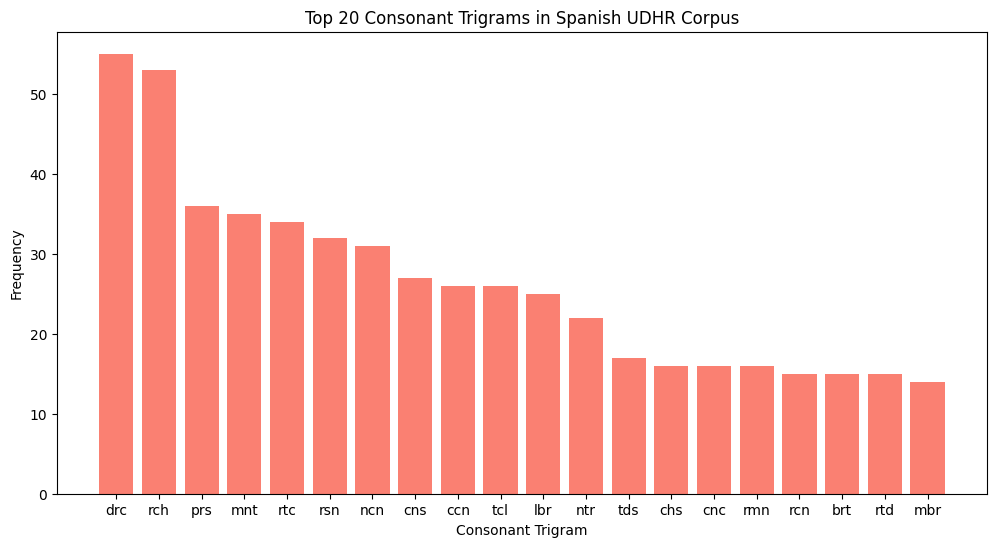

In [ ]:
top_trigrams = trigram_freq.most_common(20)
plt.figure(figsize=(12, 6))
plt.bar([ ''.join(tri) for tri, cnt in top_trigrams], [ cnt for tri, cnt in top_trigrams], color='salmon')
plt.title("Top 20 Consonant Trigrams in Spanish UDHR Corpus")
plt.xlabel("Consonant Trigram")
plt.ylabel("Frequency")
plt.show()